
 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/2022_FIFA_World_Cup_Qatar_%28Wordmark%29.svg/1920px-2022_FIFA_World_Cup_Qatar_%28Wordmark%29.svg.png" alt="Logo del Mundial de Fútbol Varonil Qatar 2022" width="500" height="600"> 
 <h1 style="text-align: center;">Qatar 2022 Manipulación de Datos</h1>

<h2>En el siguiente documento vamos a analizar datos sobre el Mundial de la FIFA de Qatar 2022.</h2>
<h3>A pesar de la compleja naturaleza del fútbol, vamos a intentar encontrar una relación linear entre la posesión de balón de un equipo y los goles anotados en juego.
</h3>

<h3>Preparación de los datos</h3>

Vamos a leer el archivo .csv con Pandas y convertirlo en una matriz de Numpy.

In [119]:
import pandas as pd
import numpy as np

#Abrimos el archivo .csv con los datos como un dataframe de Pandas
df = pd.read_csv('~/Desktop/datasets/Fifa_world_cup_matches.csv')

#Removemos el signo de porcentaje para poder usar los datos de posesión de balón como datos de tipo int
df['possession team1'] = df['possession team1'].str.replace('%','')
df['possession team2'] = df['possession team2'].str.replace('%','')

#Aquí cohersionamos los datos de las columnas de posesión y goles para evitar problemas de compatibilidad más tarde
df['possession team1'] = df['possession team1'].astype(int)
df['possession team2'] = df['possession team2'].astype(int)
df['number of goals team1'] = df['number of goals team1'].astype(int)
df['number of goals team2'] = df['number of goals team2'].astype(int)

#Pasamos de un dataframe con Pandas a una matriz con Numpy
matriz=np.asmatrix(df)

#Imprimimos la matriz para encontrar posibles errores
print(matriz)

[['QATAR' 'ECUADOR' 42 ... 72 256 279]
 ['ENGLAND' 'IRAN' 72 ... 72 139 416]
 ['SENEGAL' 'NETHERLANDS' 44 ... 73 263 251]
 ...
 ['FRANCE' 'MOROCCO' 34 ... 47 328 218]
 ['CROATIA' 'MOROCCO' 45 ... 72 288 277]
 ['ARGENTINA' 'FRANCE' 46 ... 104 280 409]]


Ahora vamos a conseguirla forma de la matriz para saber las dimensiones de nuestra matriz de trabajo.

In [114]:
#Creamos la variable forma para evaluar los resultados del siguiente paso
forma=np.shape(matriz)
print (forma)

(64, 88)


Ahora vamos a cortar las columnas que utilizaremos (las de posesión de balón y las de gol en tiempo de juego). Luego de cortar vamos a combinarlas en una columna por variable. Al final agregamos los dos vectores en una matriz.

In [117]:
#Cortamos las columnas con la posesión de balón y mantenemos la forma que necesitamos para el vector
equiposa=matriz[:,2].reshape(-1)
equiposb=matriz[:,3].reshape(-1)

#Cambiamos el significado de la variable a la transpuesta del vector
equiposa=equiposa.transpose()
equiposb=equiposb.transpose()

#Concatenamos ambos vectores en la misma columna por ser parte de la misma variable
equipos=np.concatenate((equiposa,equiposb),axis=0)

#Hacemos lo mismo con la variable de goles en partido.
golesa=matriz[:,5].reshape(-1)
golesb=matriz[:,6].reshape(-1)

golesa=golesa.transpose()
golesb=golesb.transpose()

goles=np.concatenate((golesa,golesb),axis=0)

#Agergamos los vectores de posesión y goles a la misma matriz
utiles=np.concatenate((equipos,goles), axis=1)

#Creamos la variable w para verificar la forma de la matriz
w=np.shape(utiles)

#Imprimimos para verificar los resultados
print(utiles)
print(w)


[[42 0]
 [72 6]
 [44 0]
 [51 1]
 [64 1]
 [55 0]
 [54 0]
 [56 4]
 [32 0]
 [65 1]
 [74 7]
 [46 1]
 [43 1]
 [49 0]
 [55 3]
 [53 2]
 [51 0]
 [42 1]
 [48 1]
 [51 0]
 [50 0]
 [30 2]
 [44 2]
 [50 2]
 [48 0]
 [56 0]
 [41 4]
 [56 1]
 [38 3]
 [53 2]
 [51 1]
 [53 2]
 [54 2]
 [51 1]
 [33 0]
 [42 0]
 [24 1]
 [30 1]
 [24 0]
 [29 1]
 [43 0]
 [52 1]
 [14 2]
 [27 2]
 [46 0]
 [34 2]
 [45 2]
 [31 1]
 [33 3]
 [53 2]
 [48 3]
 [54 3]
 [35 1]
 [47 4]
 [22 0]
 [43 6]
 [45 1]
 [45 2]
 [22 1]
 [54 1]
 [34 3]
 [34 2]
 [45 2]
 [46 3]
 [50 2]
 [19 2]
 [45 2]
 [39 1]
 [24 2]
 [33 0]
 [31 0]
 [35 1]
 [57 0]
 [22 2]
 [17 0]
 [43 0]
 [46 0]
 [38 0]
 [35 2]
 [34 0]
 [33 2]
 [48 3]
 [39 1]
 [40 0]
 [31 1]
 [57 0]
 [44 1]
 [36 0]
 [39 1]
 [32 2]
 [46 1]
 [33 1]
 [49 3]
 [32 3]
 [40 0]
 [35 0]
 [38 0]
 [32 2]
 [58 3]
 [45 1]
 [60 0]
 [56 0]
 [67 2]
 [55 2]
 [47 0]
 [36 2]
 [78 1]
 [60 4]
 [39 2]
 [55 1]
 [41 3]
 [56 0]
 [54 1]
 [35 1]
 [42 1]
 [35 0]
 [51 1]
 [44 1]
 [68 0]
 [48 1]
 [45 1]
 [44 2]
 [65 0]
 [36 2]
 [54 0]


Vamos a convertir la matriz de Numpy en un dataframe de Pandas.

In [124]:
#Creamos una lista con los títulos de cada columna
titulos=['Posesión',"Goles"]

#Creamos el dataframe con los datos de la matriz utiles y los títulos de la lista.
df=pd.DataFrame(data=utiles, columns=titulos)

#Imprimimos el resultado
print(df)

    Posesión Goles
0         42     0
1         72     6
2         44     0
3         51     1
4         64     1
..       ...   ...
123       36     2
124       54     0
125       55     0
126       45     1
127       40     3

[128 rows x 2 columns]


<h3>Visualización</h3>
Usaremos una gráfica de dispersión para tener una primera aproximación a la relación entre las variables.


<AxesSubplot:xlabel='Posesión', ylabel='Goles'>

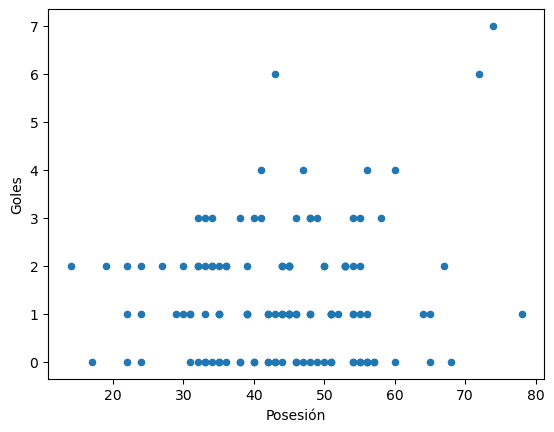

In [127]:
df.plot(x='Posesión',y='Goles',kind='scatter')

Ya que la relación entre las variables no es evidente vamos a usar el Coeficiente de Correlación Pearson para terminar de descartar la relación linear.